## **Import Library**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Explore Dataset**

In [ ]:
# path to the dataset directory
base_dir = '/content/drive/MyDrive/Dataset/capstone'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
# count images in the directory
def count_images_in_directory(directory):
    total_images = 0
    for _, _, filenames in os.walk(directory):
        total_images += len(filenames)
    return total_images

dataset_count = count_images_in_directory(base_dir)
train_count = count_images_in_directory(train_dir)
val_count = count_images_in_directory(val_dir)
test_count = count_images_in_directory(test_dir)

print(f"Total dataset: {dataset_count} images")
print(f"Training data: {train_count} images")
print(f"Validation data: {val_count} images")
print(f"Testing data: {test_count} images")

Total dataset: 1100 images
Training data: 880 images
Validation data: 110 images
Testing data: 110 images


In [ ]:
# count images per label in the directory
def count_images_per_label(directory):
    label_counts = {}
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            total_images_in_label = len(os.listdir(label_path))
            label_counts[label] = total_images_in_label
    return label_counts

train_label_counts = count_images_per_label(train_dir)
val_label_counts = count_images_per_label(val_dir)
test_label_counts = count_images_per_label(test_dir)

print(f"Total of labels in training data: {len(train_label_counts)}")
for label, count in train_label_counts.items():
    print(f"Label: {label}, Count: {count} images")

print(f"\nTotal of labels in validation data: {len(val_label_counts)}")
for label, count in val_label_counts.items():
    print(f"Label: {label}, Count: {count} images")

print(f"\nTotal of labels in testing data: {len(test_label_counts)}")
for label, count in test_label_counts.items():
    print(f"Label: {label}, Count: {count} images")

Total of labels in training data: 11
Label: eyelid_lump, Count: 80 images
Label: keratosis, Count: 80 images
Label: ringworm, Count: 80 images
Label: scabies, Count: 80 images
Label: pyoderma, Count: 80 images
Label: leprosy, Count: 80 images
Label: flea_allergy, Count: 80 images
Label: entropion, Count: 80 images
Label: nasal_discharge, Count: 80 images
Label: conjuntivis, Count: 80 images
Label: ear_mites, Count: 80 images

Total of labels in validation data: 11
Label: scabies, Count: 10 images
Label: flea_allergy, Count: 10 images
Label: leprosy, Count: 10 images
Label: ringworm, Count: 10 images
Label: nasal_discharge, Count: 10 images
Label: keratosis, Count: 10 images
Label: entropion, Count: 10 images
Label: eyelid_lump, Count: 10 images
Label: pyoderma, Count: 10 images
Label: ear_mites, Count: 10 images
Label: conjuntivis, Count: 10 images

Total of labels in testing data: 11
Label: ringworm, Count: 10 images
Label: leprosy, Count: 10 images
Label: scabies, Count: 10 images
La

In [ ]:
# list files in training data
for dirname, _, filenames in os.walk(train_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Dataset/capstone/train/eyelid_lump/D7_34e6d898-60a5-11ec-8402-0a7404972c70_jpg.rf.bbc255cabcb5aa81ee5a3915a7920d95.jpg
/content/drive/MyDrive/Dataset/capstone/train/eyelid_lump/crop_D18_10a43721-60a5-11ec-8402-0a7404972c70_jpg.rf.70bcd3a24bbc2af1aa785eb39fb2943a.jpg
/content/drive/MyDrive/Dataset/capstone/train/eyelid_lump/crop_D13_3dabdf97-60a5-11ec-8402-0a7404972c70_jpg.rf.b61500ef0361ff0322de9839a2dd012d.jpg
/content/drive/MyDrive/Dataset/capstone/train/eyelid_lump/crop_D34_353822c8-60a5-11ec-8402-0a7404972c70_jpg.rf.817b560ed8368ea855fdeab439bdbabd.jpg
/content/drive/MyDrive/Dataset/capstone/train/eyelid_lump/crop_D22_34cb1f45-60a5-11ec-8402-0a7404972c70_jpg.rf.8e83a6785a483156e4a6fbfb76ed74d2.jpg
/content/drive/MyDrive/Dataset/capstone/train/eyelid_lump/crop_D17_3dcc3a32-60a5-11ec-8402-0a7404972c70_jpg.rf.15261b6e3a2f039c92204713d4839ccb.jpg
/content/drive/MyDrive/Dataset/capstone/train/eyelid_lump/crop_D11_10851a98-60a5-11ec-8402-0a7404972c70_jpg.rf.7449be6

In [ ]:
# list files in validation data
for dirname, _, filenames in os.walk(val_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Dataset/capstone/validation/scabies/scabies_122_png.rf.fa764276c798f7b1fa3c87e6057e4443.jpg
/content/drive/MyDrive/Dataset/capstone/validation/scabies/Image_44-2-_jpg.rf.2d277e477d7300f2d3bb05765ec7fce4.jpg
/content/drive/MyDrive/Dataset/capstone/validation/scabies/Image_33-3-_jpg.rf.0deb90e5a64c700ec6cf6e43c99705ed.jpg
/content/drive/MyDrive/Dataset/capstone/validation/scabies/image-asset.jpeg
/content/drive/MyDrive/Dataset/capstone/validation/scabies/Image_10-3-_jpg.rf.2b24813fe018956e99465c222342728a.jpg
/content/drive/MyDrive/Dataset/capstone/validation/scabies/Image_12_jpg.rf.6a363d887f5a6ca3ec89a3e5f5a94884.jpg
/content/drive/MyDrive/Dataset/capstone/validation/scabies/Image_25_jpg.rf.3bb7dceced83348265c1e25c13287d96.jpg
/content/drive/MyDrive/Dataset/capstone/validation/scabies/scabies_124_png.rf.b1f2dd2a546359526dc5126dd754c1ff.jpg
/content/drive/MyDrive/Dataset/capstone/validation/scabies/scabies_125_png.rf.5e27037cd8b2b42921dbaaf014ad36a0.jpg
/content/d

In [ ]:
# list files in test data
for dirname, _, filenames in os.walk(test_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Dataset/capstone/test/ringworm/1000010640_x16_jpg.rf.445f21732119d09608422d8505e0d6ba.jpg
/content/drive/MyDrive/Dataset/capstone/test/ringworm/1000010696_x4_jpg.rf.4a77ab6c3f94601249e4e815f327dd7a.jpg
/content/drive/MyDrive/Dataset/capstone/test/ringworm/1000010682_x16_jpg.rf.a30d3fb701cdf8d3df66d9a8d4a99508.jpg
/content/drive/MyDrive/Dataset/capstone/test/ringworm/Image_12-2-_jpg.rf.9b5454dcaaa036efd74011ce399cb9c5.jpg
/content/drive/MyDrive/Dataset/capstone/test/ringworm/Image_2-3-_jpg.rf.d0f33eae4ac6b209046c3d8c84add811.jpg
/content/drive/MyDrive/Dataset/capstone/test/ringworm/image_84_jpg.rf.94f0cbcfb2deeeb7b4aecf6eef2cf060.jpg
/content/drive/MyDrive/Dataset/capstone/test/ringworm/ringworm-7-_jpg.rf.2f561378badbadb6accd5b9fcae1c887.jpg
/content/drive/MyDrive/Dataset/capstone/test/ringworm/image_83_jpg.rf.4359f6dc558437c916a34ba5bde74f78.jpg
/content/drive/MyDrive/Dataset/capstone/test/ringworm/OIP-15-_x4_jpg.rf.e4a8e9ddd6e59c1c4cdd63a2327d5cf1.jpg
/content/d

## **Preprocessing Data**

In [ ]:
# batch size and image size
batch_size = 16
img_height = 224
img_width = 224

# define augmentation and normalization parameters for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
  )

# define normalization parameters for validation and testing data
val_test_datagen = ImageDataGenerator(
    rescale=1.0/255
  )

# load training data
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=123
  )

# load validation data
val_data = val_test_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    seed=123
  )

# load testing data
test_data = val_test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    seed=123
  )

Found 880 images belonging to 11 classes.
Found 110 images belonging to 11 classes.
Found 110 images belonging to 11 classes.


In [ ]:
# get the first batch of images and labels
iterator = iter(train_data)
images, labels = next(iterator)

# display the first batch information
print(f"Shape of batch of images: {images.shape}")
print(f"Shape of batch of labels: {labels.shape}")

Shape of batch of images: (16, 224, 224, 3)
Shape of batch of labels: (16, 11)


Training images with labels:


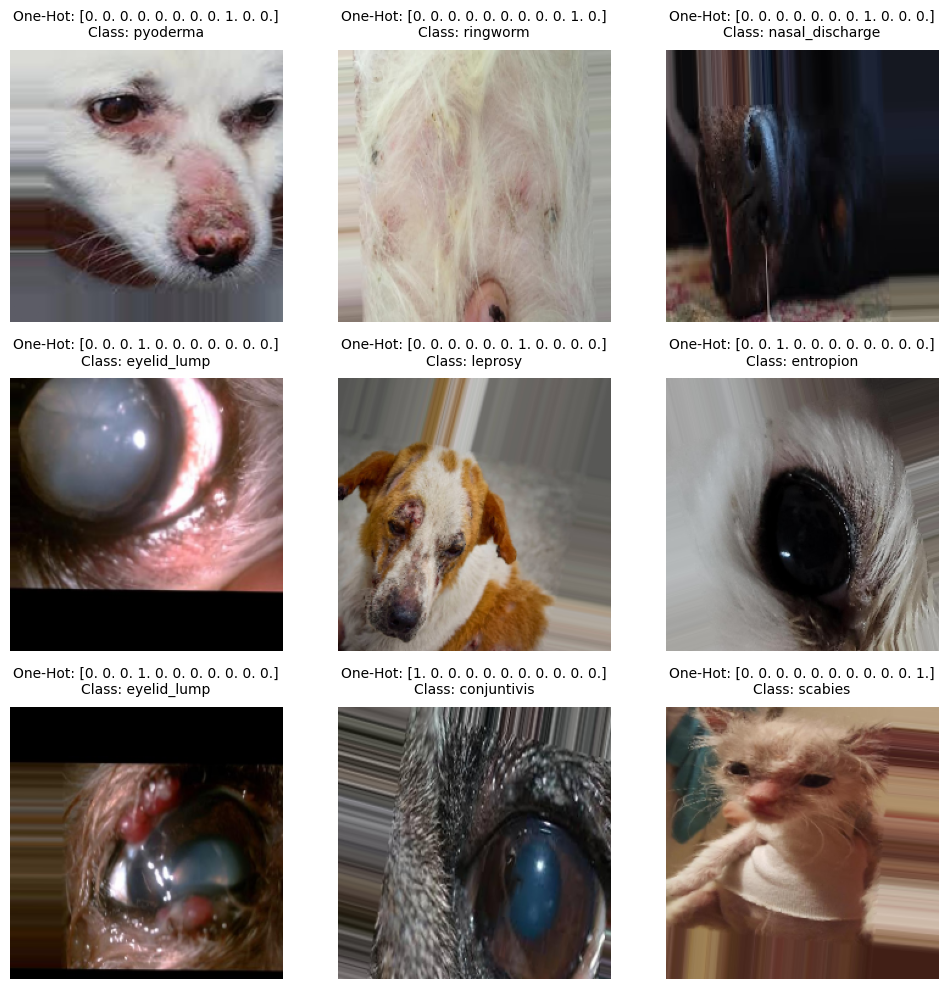


Validation images with labels:


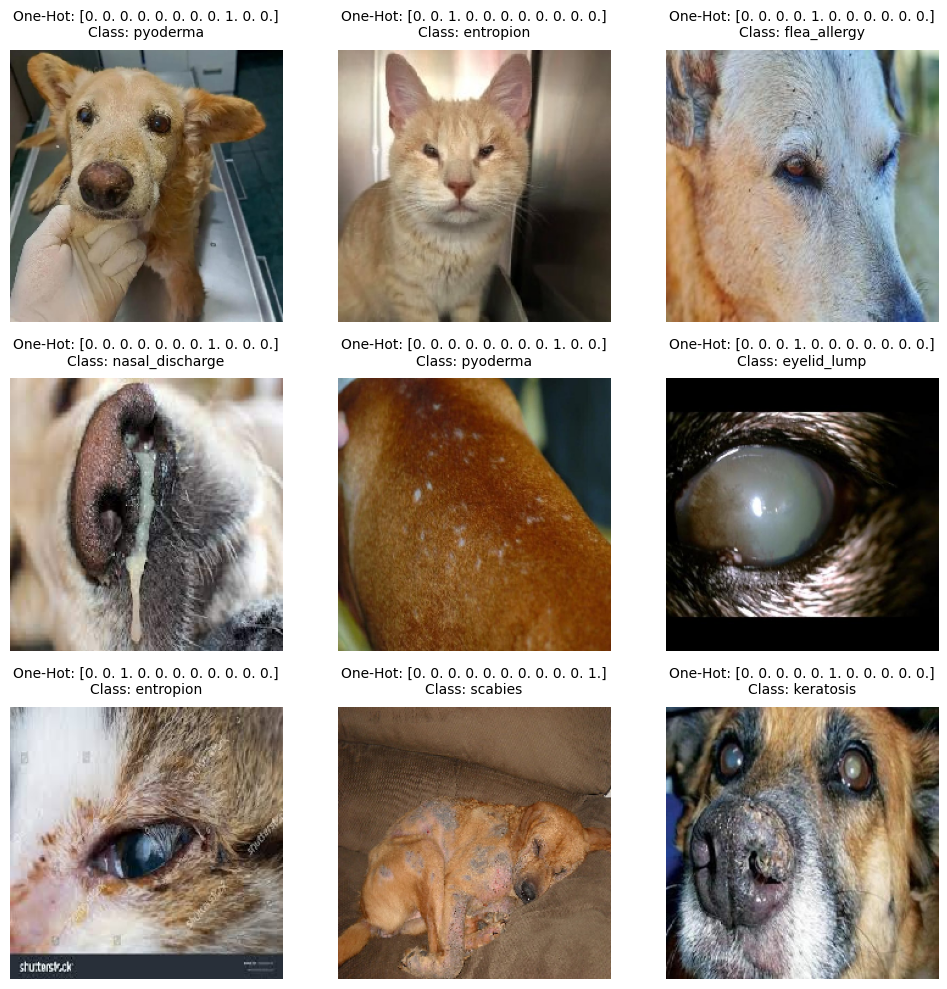


Testing images with labels:


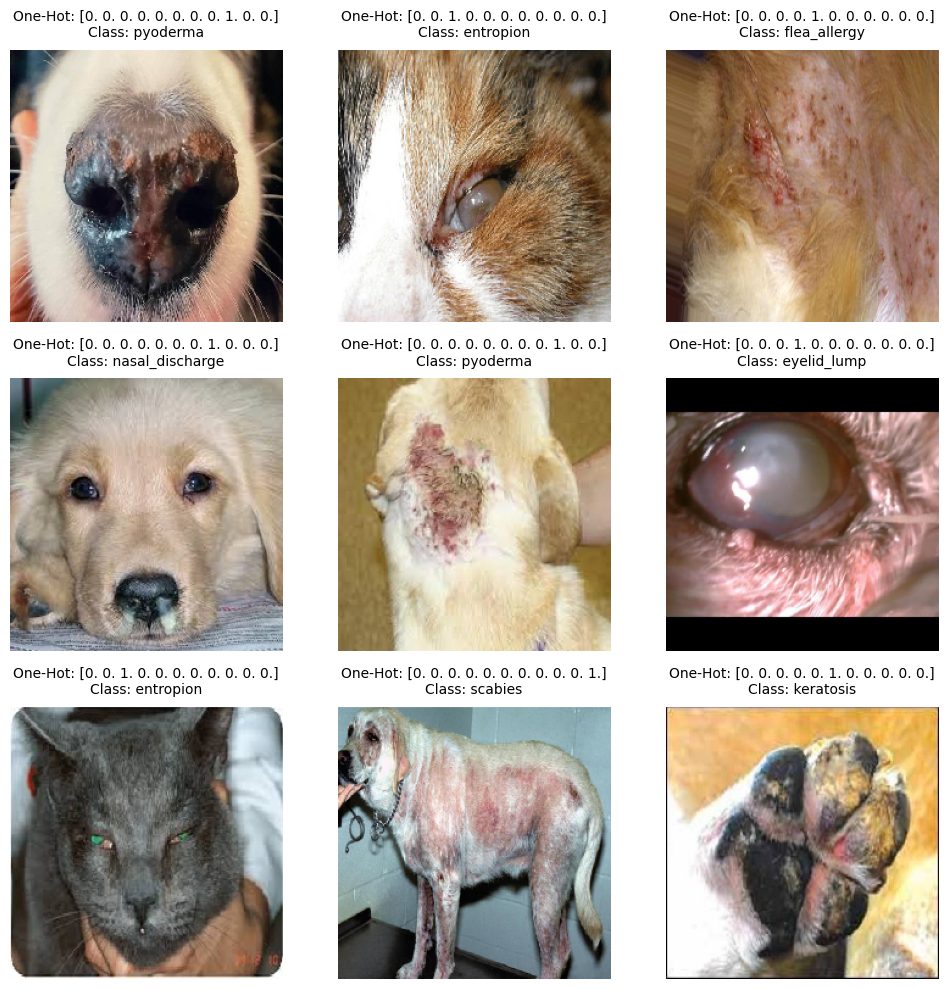

In [ ]:
# display the image along with the label
def display_images_with_labels(data, num_images=9):
    # take the first batch
    images, labels = next(data)

    plt.figure(figsize=(10, 10))
    for i in range(min(num_images, len(images))):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis("off")

        # display one-hot encoding
        one_hot_label = labels[i]
        # display the class name based on one-hot encoding
        class_index = np.argmax(one_hot_label)
        class_name = list(data.class_indices.keys())[class_index]

        # combine one-hot encoding and class name
        plt.title(f"One-Hot: {one_hot_label}\nClass: {class_name}", fontsize=10, pad=10)

    plt.tight_layout()
    plt.show()

print("Training images with labels:")
display_images_with_labels(train_data)

print("\nValidation images with labels:")
display_images_with_labels(val_data)

print("\nTesting images with labels:")
display_images_with_labels(test_data)

## **Modeling**

### **MobileNet**

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# load base model MobileNetV2
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# fine-tune a few layers
for layer in base_model.layers[-20:]:
    layer.trainable = True

# custom layers on top of base model
x = base_model.output

# additional CNN layers
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x)

# flattening and dense layers
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)

# output layer
output = Dense(11, activation='softmax')(x)

# define model
model = Model(inputs=base_model.input, outputs=output)

# compile the model
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 5,570,251 (21.25 MB)

 Trainable params: 5,535,883 (21.12 MB)

 Non-trainable params: 34,368 (134.25 KB)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=100,
    #callbacks=[early_stopping]
)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 239s 4s/step - accuracy: 0.1745 - loss: 2.3894 - val_accuracy: 0.2818 - val_loss: 2.0804
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.3370 - loss: 1.8790 - val_accuracy: 0.4364 - val_loss: 1.6825
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 216s 4s/step - accuracy: 0.4430 - loss: 1.5573 - val_accuracy: 0.5182 - val_loss: 1.4259
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.5358 - loss: 1.3647 - val_accuracy: 0.4364 - val_loss: 1.5008
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 217s 4s/step - accuracy: 0.5709 - loss: 1.2327 - val_accuracy: 0.5636 - val_loss: 1.3173
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 212s 4s/step - accuracy: 0.6244 - loss: 1.0656 - val_accuracy: 0.5182 - val_loss: 1.2591
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 217s 4s/step - accuracy: 0.6595 - loss: 0.9290 - val_accuracy: 0.4909 - val_loss: 1.3329
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 213s 4s/step - accuracy: 0.7257 - loss: 0.8061 - val_accuracy: 0.

### **InceptionV3**

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.inception_v3 import preprocess_input

# load InceptionV3
base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# freeze all layers in the base model
base_model.trainable = False

x = base_model.output

# flatten layers
x = Flatten()(x)

# fully connected layers
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)

# output layer
output = Dense(11, activation='softmax')(x)

# define model
model = Model(inputs=base_model.input, outputs=output)

model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 111, 111, 32)   │            864 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_34    │ (None, 111, 111, 32)   │             96 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_35    │ (None, 109, 109, 32)   │             96 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_36    │ (None, 109, 109, 64)   │            192 │ conv2d_7[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_37    │ (None, 54, 54, 80)     │            240 │ conv2d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_38    │ (None, 52, 52, 192)    │            576 │ conv2d_9[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 48,186,923 (183.82 MB)

 Trainable params: 26,382,347 (100.64 MB)

 Non-trainable params: 21,804,576 (83.18 MB)

In [ ]:
# compile model
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# train the model
model.fit(
    train_data,
    validation_data=val_data,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 181s 3s/step - accuracy: 0.2497 - loss: 2.5342 - val_accuracy: 0.3545 - val_loss: 2.2770
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.4280 - loss: 1.6640 - val_accuracy: 0.3818 - val_loss: 1.6979
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.4869 - loss: 1.4416 - val_accuracy: 0.4000 - val_loss: 1.8203
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.5581 - loss: 1.1915 - val_accuracy: 0.4455 - val_loss: 1.4864
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - accuracy: 0.5575 - loss: 1.2675 - val_accuracy: 0.5000 - val_loss: 1.4606
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.6401 - loss: 1.0269 - val_accuracy: 0.4091 - val_loss: 1.6541
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.6289 - loss: 1.0551 - val_accuracy: 0.4636 - val_loss: 1.6190
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.5941 - loss: 1.0386 - val_accuracy: 0.